Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Testing 1, 2, 3

# Phase 2 Project

### Importing Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Formatting Cell

In [2]:
pd.set_option('display.max_rows', 1000) #change the amount of rows displayed

## Glossary

### Column Names and descriptions for Kings County Data Set
(source: Data/column_names.md)
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathrooms** -  of bathrooms/bedrooms
* **sqft_livings** -  footage of the home
* **sqft_lots** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Building Condition Explaination
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#d (accessed 12/6/2021)

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.


### Building Grade Explaination
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#d (accessed 12/6/2021)


Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

# Data Cleaning

## Dropping Uncessary Columns

In [3]:
df = df.drop(df[['id', 'date', 'view', 'lat', 'long', 'yr_renovated']], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,1800,7503


## Checking Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  sqft_living15  21597 non-null  int64  
 14  sqft_lot15     21597 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.5+ MB


### Fixing sqft_basement
- slicing out all records with a '?' and calculating the correct value using other known fields.

In [5]:
unknown_basements = df[df['sqft_basement'] == '?']
known_basements = df[df['sqft_basement'] != '?']

print('Unkown Basement:',(len(unknown_basements)))
print('Known Basement:',(len(known_basements)))

Unkown Basement: 454
Known Basement: 21143


In [6]:
sqft_basement = unknown_basements.apply(lambda x: x['sqft_living'] - x['sqft_above'], axis=1)
unknown_basements['sqft_basement'] = sqft_basement

cleaned_df = known_basements.append(unknown_basements)

#changing to float so that decminals are in the same format
cleaned_df['sqft_basement'] = cleaned_df['sqft_basement'].astype(float)
cleaned_df['sqft_above'] = cleaned_df['sqft_above'].astype(float)

cleaned_df['sqft_basement'].value_counts().head()

<ipython-input-6-1fc1beccaa25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_basements['sqft_basement'] = sqft_basement


0.0      13110
600.0      221
700.0      218
500.0      214
800.0      206
Name: sqft_basement, dtype: int64

### Changing Zip Code to Category

In [7]:
cleaned_df['zipcode'] = df['zipcode'].astype(str)
cleaned_df['zipcode'].value_counts().head()

98103    602
98038    589
98115    583
98052    574
98117    553
Name: zipcode, dtype: int64

### Dropping Bedroom Outliers

In [8]:
#dropping outliers
cleaned_df = cleaned_df.sort_values('bedrooms', ascending=False).reset_index()
cleaned_df = cleaned_df.drop([0,1,2])
cleaned_df.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
3,19239,660000.0,10,3.00,2920,3745,2.0,0.0,4,7,1860.0,1060.0,1913,98105,1810,3745
4,13301,1150000.0,10,5.25,4590,10920,1.0,0.0,3,9,2500.0,2090.0,2008,98004,2730,10400
5,8537,450000.0,9,7.50,4050,6504,2.0,0.0,3,7,4050.0,0.0,1996,98144,1448,3866
6,18428,934000.0,9,3.00,2820,4480,2.0,0.0,3,7,1880.0,940.0,1918,98105,2460,4400
7,4231,700000.0,9,3.00,3680,4400,2.0,0.0,3,7,2830.0,850.0,1908,98102,1960,2450


In [9]:
#dropping index
cleaned_df = cleaned_df.drop(['index'], axis=1)

In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21594 entries, 3 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21594 non-null  float64
 1   bedrooms       21594 non-null  int64  
 2   bathrooms      21594 non-null  float64
 3   sqft_living    21594 non-null  int64  
 4   sqft_lot       21594 non-null  int64  
 5   floors         21594 non-null  float64
 6   waterfront     19218 non-null  float64
 7   condition      21594 non-null  int64  
 8   grade          21594 non-null  int64  
 9   sqft_above     21594 non-null  float64
 10  sqft_basement  21594 non-null  float64
 11  yr_built       21594 non-null  int64  
 12  zipcode        21594 non-null  object 
 13  sqft_living15  21594 non-null  int64  
 14  sqft_lot15     21594 non-null  int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 2.6+ MB


### Exploring Data with Scatter Plot

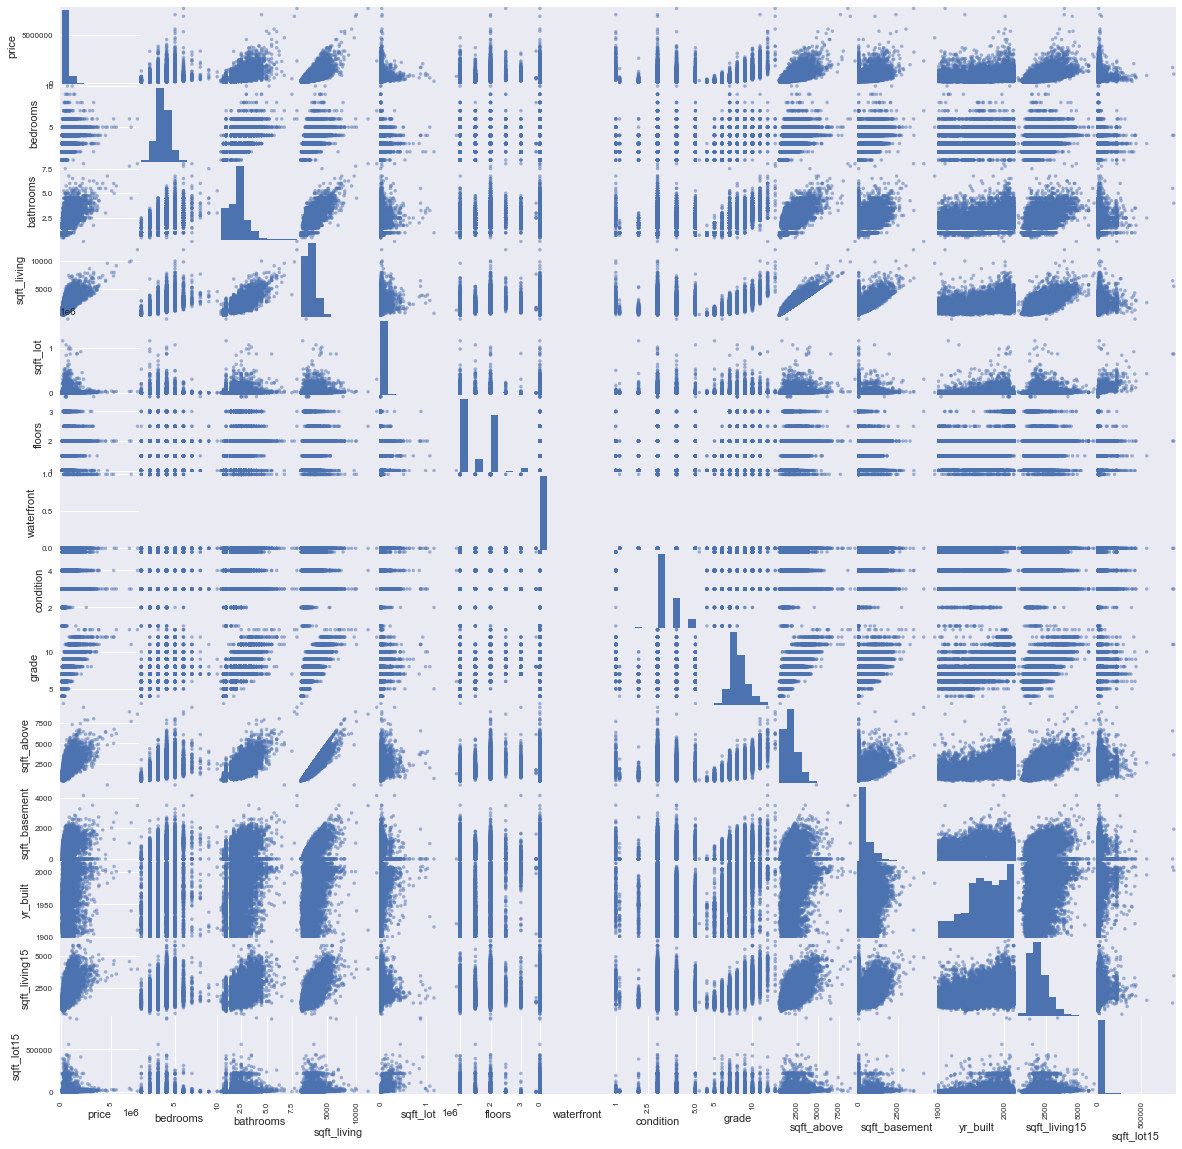

In [11]:
#using scatter plot to look for linear relationships
pd.plotting.scatter_matrix(cleaned_df, figsize = [20,20]);
plt.show()

### Analysis:
At first glance, the following variables seem to have linear relationships:
- price with bedrooms, sqft_above, & sqft_basement.
    - price also seems to have a linear relationship with categorical variable 'grade'.
- bedrooms with bathrooms, sqft_living, sqft_above, & sqft_basement
- sqft_living and sqft_above have the closest linear relationship
    - They are very similar data points. I may need to eliminate one to prevent multicolinearity.
    
The Following Variables seem to be categorical:
- floors
- waterfront
- condition
- zip code (not shown because I have already made it an object)

Ordinal Variables:
- bedrooms
- bathrooms



### What To Do with the Ordinal Values

I am going to treat grade as a continuous variable as it has very linear relationships with many features. Including price.

## Checking for Null Values

In [12]:
cleaned_df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Fixing Waterfront

In [13]:
waterfront_cleaned = cleaned_df['waterfront'].fillna(0) 
cleaned_df['waterfront'] = waterfront_cleaned
cleaned_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploratory Data Analysis

In [14]:
cleaned_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.159400e+04,21594.000000,21594.000000,21594.000000,2.159400e+04,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000
mean,5.402878e+05,3.371168,2.115808,2080.229740,1.510045e+04,1.494072,0.006761,3.409743,7.658007,1788.546633,291.683106,1971.003844,1986.674493,12759.056914
std,3.673922e+05,0.901536,0.769010,918.084207,4.141540e+04,0.539688,0.081950,0.650482,1.173256,827.749396,442.684260,29.374473,685.252555,27276.229189
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068475e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,2360.000000,10082.250000
max,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000


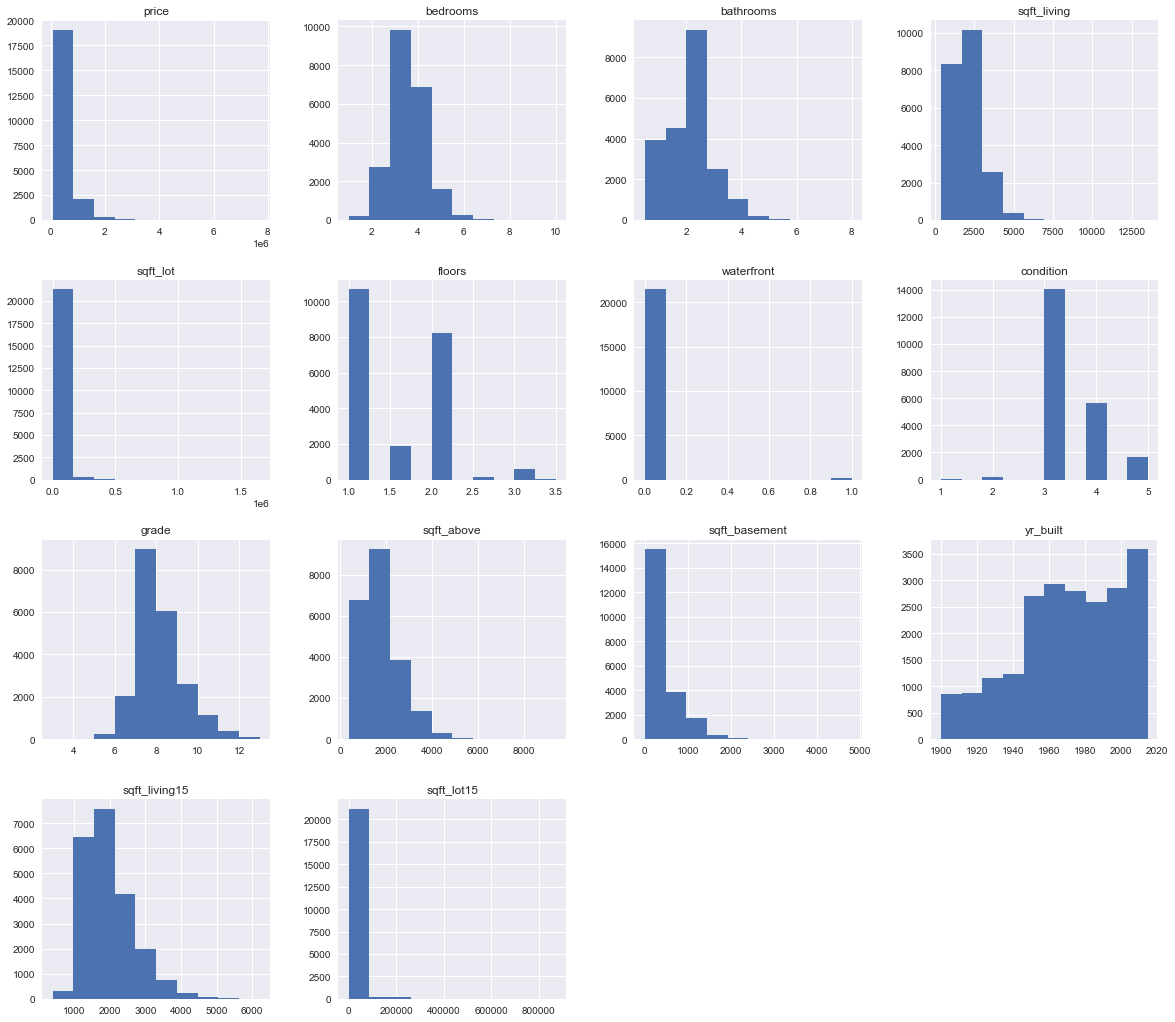

In [15]:
cleaned_df.hist(figsize = (20,18));

Analysis:
- Price is very skewed. I will need to fix this as it is my target variable.

## Analysis of key variables again the Target (price) using jointplots

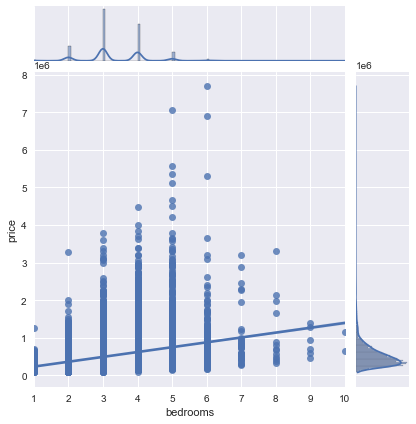

In [16]:
sns.jointplot('bedrooms','price', data=cleaned_df, kind='reg');

<u>Bedrooms</u>: While this is an ordinal variable, it behaves more like a categorical than a continuous variable. 
7 bedrooms isn't necessarily better than 2 bedrooms, it all depends on the house itself. I should
one-hot-encode this as a categorical when I get to that step.

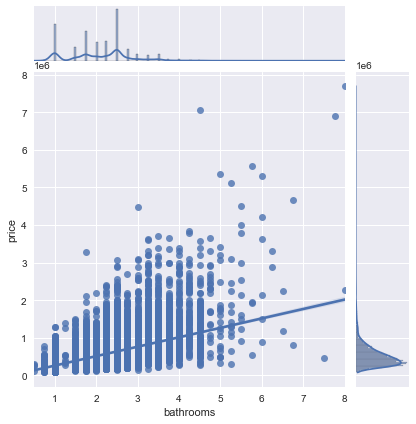

In [17]:
sns.jointplot('bathrooms','price', data=cleaned_df, kind='reg');

<u>Bathroooms</u>: Unlike bedrooms, bathrooms behave more like a continous variable than a categorical one, so I will treat it as such.

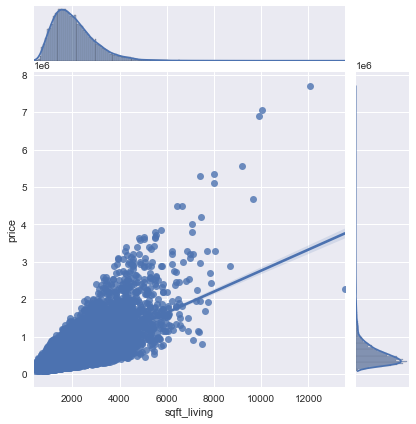

In [18]:
sns.jointplot('sqft_living','price', data=cleaned_df, kind='reg');

<u>Sqft_living</u>: This seems to be a very linear relationship. This makes sense as the bigger the house it, the more likely that it will be more expensive.

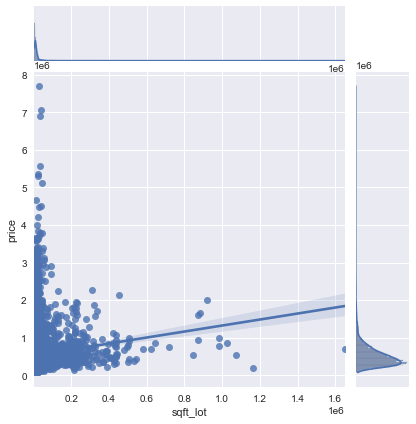

In [19]:
sns.jointplot('sqft_lot','price', data=cleaned_df, kind='reg');

<u>sqft_lot</u>: Lot size has a slight correlation with the price of a house, but there are a lot of outliers, especially with little to no lot size. It will be hard to use this as a predictor.

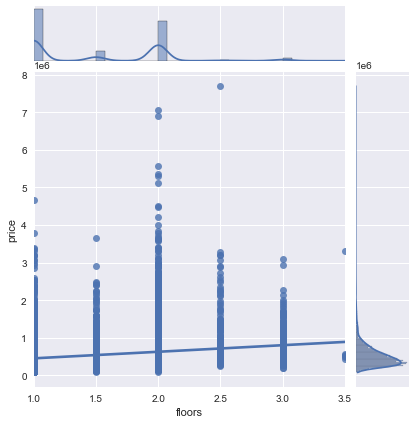

In [20]:
sns.jointplot('floors','price', data=cleaned_df, kind='reg');

<u>Floors</u>: Floors is another ordinal that behaves more like a categorical value than a continuous one and will be treated as such.

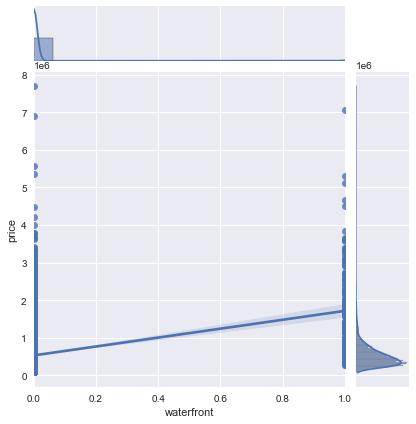

In [21]:
sns.jointplot('waterfront','price', data=cleaned_df, kind='reg');

<u>Waterfront</u>: There appears to be a slight linear relationship between price and being on the waterfront.

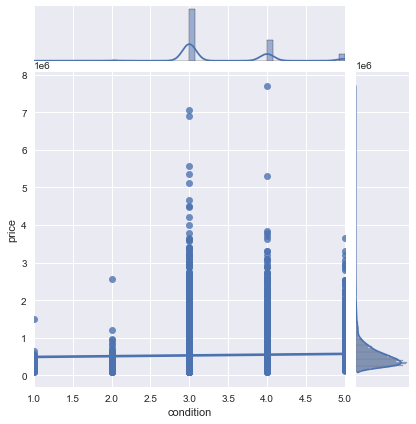

In [22]:
sns.jointplot('condition','price', data=cleaned_df, kind='reg');

<u>Condition</u>: If treated strictly as a continous variable,  condition doesn't have much of an affect on price. I can drop this.

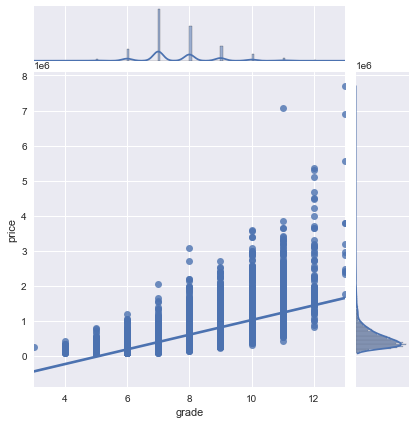

In [23]:
sns.jointplot('grade','price', data=cleaned_df, kind='reg');

<u>Grade</u>: Grade is a fairly linear relationship with a little noise. I should keep it as a continous variable. The relationship looks like it could be improved with some cleaning, removing outliers, etc.

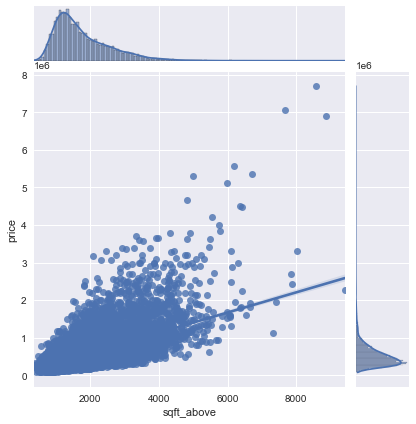

In [24]:
sns.jointplot('sqft_above','price', data=cleaned_df, kind='reg');

<u>Sqft_Above</u>: Based on their description in the glossary, this is almost exactly the same thing as sqft_living. I will almost definitely need to remove one of the two of these variables and use the other due to multicolinearity. I will determine which to use when I check for that.

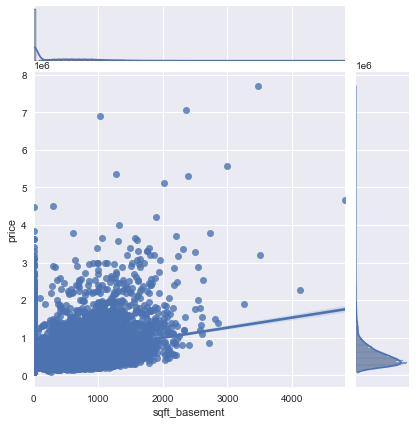

In [25]:
sns.jointplot('sqft_basement','price', data=cleaned_df, kind='reg');

<u>Sqft Basement</u>: Basement size has a slight linear relationship with price. But I also see that there are many outliers that have very little size that are skewing the results.

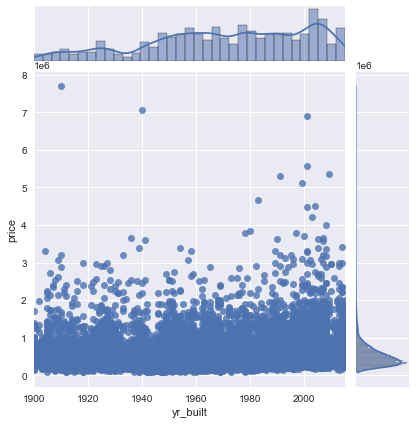

In [26]:
sns.jointplot('yr_built','price', data=cleaned_df, kind='reg');

<u>Year Built</u>: Appears to have no relationship with Price and can likely be excluded from analysis.

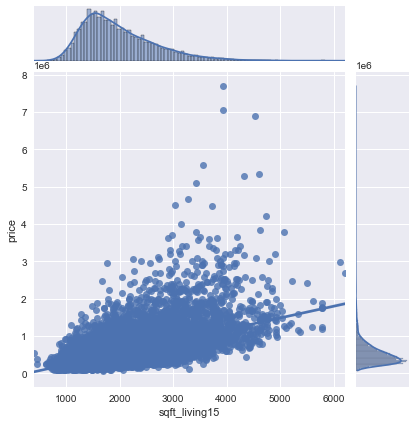

In [27]:
sns.jointplot('sqft_living15','price', data=cleaned_df, kind='reg');

<u>sqft_living15</u>: The size of houses nearby does have a linear relationship with price. Looks fairly close to sqft_living and sqft_above so there's a strong chance of multicolinearity here as well.

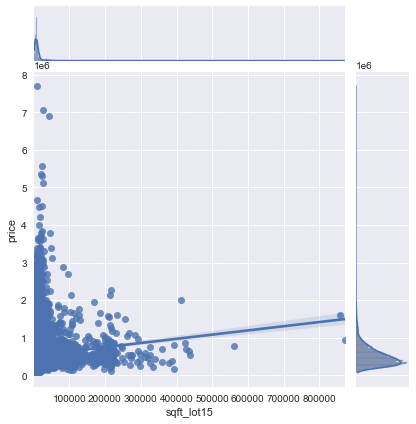

In [28]:
sns.jointplot('sqft_lot15','price', data=cleaned_df, kind='reg');

<u>sqft_lot15</u>: Looks identical to sqft_lot, which I likely won't end up using. This will likely be dropped as well. If I use either, it would be just that one as they are very likely to be multicolinear.

## Drop Columns

In [29]:
#lets go ahead and remove the features that aren't useful, per my analysis of the jointplots.
cleaned_df = cleaned_df.drop(['sqft_lot', 'yr_built', 'sqft_lot15', 'condition'], axis=1)
cleaned_df.head(1)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_above,sqft_basement,zipcode,sqft_living15
3,660000.0,10,3.0,2920,2.0,0.0,7,1860.0,1060.0,98105,1810


In [30]:
feats = ['sqft_living', 'sqft_above', 'sqft_living15','bedrooms','bathrooms', 'grade',
         'sqft_basement']
corr = cleaned_df[feats].corr()
corr

,sqft_living,sqft_above,sqft_living15,bedrooms,bathrooms,grade,sqft_basement
sqft_living,1.000000,0.876432,0.756510,0.593994,0.755803,0.762923,0.435114
sqft_above,0.876432,1.000000,0.731837,0.493213,0.686700,0.756185,-0.052206
sqft_living15,0.756510,0.731837,1.000000,0.406011,0.569949,0.713865,0.200510
bedrooms,0.593994,0.493213,0.406011,1.000000,0.529021,0.367654,0.309656
bathrooms,0.755803,0.686700,0.569949,0.529021,1.000000,0.665890,0.283441
grade,0.762923,0.756185,0.713865,0.367654,0.665890,1.000000,0.168282
sqft_basement,0.435114,-0.052206,0.200510,0.309656,0.283441,0.168282,1.000000


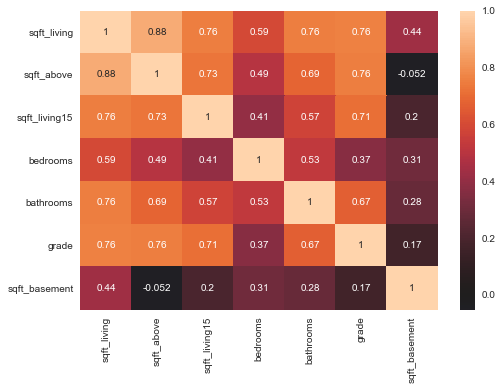

In [31]:
sns.heatmap(corr, center=0, annot=True);

# Initial Modeling 

In [32]:
list(cleaned_df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'grade',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'sqft_living15']

In [33]:
# Defining the problem
outcome = 'price'
x_cols = list(cleaned_df.columns)
x_cols.remove(outcome)

In [34]:
train, test = train_test_split(cleaned_df)

print(len(train), len(test))

16195 5399


In [35]:
print(len(train), len(test))
train.head()

16195 5399


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_above,sqft_basement,zipcode,sqft_living15
4153,370000.0,4,2.0,2020,1.5,0.0,7,1160.0,860.0,98125,1840
21222,217000.0,2,1.0,730,1.0,0.0,4,730.0,0.0,98198,1220
14320,710000.0,3,2.0,1880,1.0,0.0,8,1040.0,840.0,98109,1790
16774,1290000.0,3,2.5,2190,1.0,0.0,8,1550.0,640.0,98199,2190
8512,270000.0,4,2.5,1900,1.0,0.0,7,1900.0,0.0,98022,1420


In [36]:
test.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,sqft_above,sqft_basement,zipcode,sqft_living15
1881,768000.0,5,2.75,3030,2.0,0.0,8,3030.0,0.0,98007,2500
5402,802500.0,4,3.75,3320,2.0,0.0,10,3320.0,0.0,98075,3740
2464,215000.0,4,1.75,1610,1.0,0.0,7,1610.0,0.0,98042,1220
19267,625000.0,2,1.50,1490,1.5,0.0,7,1190.0,300.0,98116,1590
13434,870000.0,3,2.00,2320,1.5,0.0,9,2320.0,0.0,98074,3100


In [37]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     786.7
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:43:48   Log-Likelihood:            -2.1807e+05
No. Observations:               16195   AIC:                         4.363e+05
Df Residuals:                   16117   BIC:                         4.369e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.921e+05   1.67e+04    -23.491      0.000   -4.25e+05   -3.59e+05
zipcode[T.98002]  4.847e+04   1.75e+04      2.763      0.006    1.41e+04    8.29e+04
zipcode[T.98003] -1.748e+04   1.61e+04     -1.084      0.279   -4.91e+04    1.41e+04
zipcode[T.98004]  8.089e+05   1.57e+04     51.655      0.000    7.78e+05     8.4e+05
zipcode[T.98005]  2.858e+05   1.89e+04     15.102      0.000    2.49e+05    3.23e+05
zipcode[T.98006]  2.806e+05   1.44e+04     19.448      0.000    2.52e+05    3.09e+05
zipcode[T.98007]  2.564e+05   1.95e+04     13.161      0.000    2.18e+05    2.95e+05
zipcode[T.98008]  2.638e+05    1.6e+04     16.460      0.000    2.32e+05    2.95e+05
zipcode[T.98010]  7.542e+04   2.32e+04      3.253      0.001       3e+04    1.21e+05
zipcode[T.98011]  1.119e+05   1.77e+04      6.315      0.000    7.72e+04    1.47e+05
zipcode[T.98014]  1.132e+05   2.05e+04      5.536      0.000    7.31e+04    1.53e+05
zipcode[T.98019]  8.596e+04   1.86e+04      4.616      0.000    4.95e+04    1.22e+05
zipcode[T.98022]  3.991e+04    1.7e+04      2.343      0.019    6515.226    7.33e+04
zipcode[T.98023] -3.832e+04   1.39e+04     -2.760      0.006   -6.55e+04   -1.11e+04
zipcode[T.98024]  1.724e+05   2.47e+04      6.981      0.000    1.24e+05    2.21e+05
zipcode[T.98027]  1.631e+05   1.42e+04     11.471      0.000    1.35e+05    1.91e+05
zipcode[T.98028]  1.097e+05   1.57e+04      6.994      0.000    7.89e+04     1.4e+05
zipcode[T.98029]  2.039e+05   1.52e+04     13.397      0.000    1.74e+05    2.34e+05
zipcode[T.98030] -5395.3723   1.59e+04     -0.338      0.735   -3.66e+04    2.58e+04
zipcode[T.98031]  1.798e+04   1.62e+04      1.110      0.267   -1.38e+04    4.97e+04
zipcode[T.98032]  1.285e+04    2.1e+04      0.611      0.541   -2.84e+04    5.41e+04
zipcode[T.98033]  3.729e+05   1.42e+04     26.211      0.000    3.45e+05    4.01e+05
zipcode[T.98034]  2.041e+05   1.36e+04     15.008      0.000    1.77e+05    2.31e+05
zipcode[T.98038]  2.275e+04   1.34e+04      1.697      0.090   -3524.273     4.9e+04
zipcode[T.98039]  1.342e+06   3.19e+04     42.133      0.000    1.28e+06     1.4e+06
zipcode[T.98040]  5.261e+05   1.62e+04     32.526      0.000    4.94e+05    5.58e+05
zipcode[T.98042]  3359.7827   1.35e+04      0.248      0.804   -2.32e+04    2.99e+04
zipcode[T.98045]  9.521e+04   1.66e+04      5.721      0.000    6.26e+04    1.28e+05
zipcode[T.98052]  2.097e+05   1.35e+04     15.504      0.000    1.83e+05    2.36e+05
zipcode[T.98053]  1.598e+05   1.47e+04     10.872      0.000    1.31e+05    1.89e+05
zipcode[T.98055]   5.09e+04   1.61e+04      3.161      0.002    1.93e+04    8.25e+04
zipcode[T.98056]  1.054e+05   1.46e+04      7.232      0.000    7.68e+04    1.34e+05
zipcode[T.98058]  1.907e+04   1.41e+04      1.351      0.177   -8599.859    4.67e+04
zipcode[T.98059]  6.729

### Analysis of First Model:

### Refining Model

In [38]:
#removing problem zipcodes
#df_1 = cleaned_df[cleaned_df['zipcode'] == '98002']
#df_2 = cleaned_df[cleaned_df['zipcode'] == '98003']
#df_3 = cleaned_df[cleaned_df['zipcode'] == '98004']
#df_4 = cleaned_df[cleaned_df['zipcode'] == '98005']


#print('df_1:', len(df_1))
#print('df_2:', len(df_2))
#print('df_3:', len(df_3))
#print('df_4:', len(df_4))

In [39]:
#problem_zips = pd.concat([df_1, df_2, df_3, df_4])
#problem_zips

In [40]:
#cleaned_df['zipcode'].value_counts().head()

In [41]:
#cleaned_df= cleaned_df.drop(problem_zips.index)
#cleaned_df.head(1)

In [42]:
# Defining the problem
#outcome = 'price'
#x_cols = list(cleaned_df.columns)
#x_cols.remove(outcome)

In [43]:
#train, test = train_test_split(cleaned_df)

In [44]:
#print(len(train), len(test))
#train.head()

In [45]:
# Fitting the actual model
#predictors = '+'.join(x_cols)
#formula = outcome + '~' + predictors
#model = ols(formula=formula, data=train).fit()
#model.summary()

### Cleaning & Encoding

In [46]:
#dropping sqft_lot15 because of it's p-value
#encoded_df = cleaned_df_2.drop(cleaned_df_2[['sqft_lot15']], axis=1)
#encoded_df.head(1)
encoded_df= cleaned_df

In [47]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [48]:
encoded_df.columns = [col_formatting(col) for col in encoded_df.columns]

In [49]:
list(encoded_df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'grade',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'sqft_living15']

In [50]:
#one-hot encoding
#feats = ['bedrooms','floors', 'waterfront','zipcode']
feats = ['floors', 'waterfront','zipcode'] #treating bedrooms as a continous variable helps the model
#feats = ['zipcode']
encoded_df[feats] = encoded_df[feats].astype(str)
encoded_df = pd.get_dummies(encoded_df, drop_first=True)

In [52]:
encoded_df.head(1)

,price,bedrooms,bathrooms,sqft_living,grade,sqft_above,sqft_basement,sqft_living15,floors_1.5,floors_2.0,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
3,660000.0,10,3.0,2920,7,1860.0,1060.0,1810,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
encoded_df.columns = [col_formatting(col) for col in encoded_df.columns]

In [54]:
list(encoded_df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'floors_15',
 'floors_20',
 'floors_25',
 'floors_30',
 'floors_35',
 'waterfront_10',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipc

### Normalizing Data

In [55]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [56]:
df_norm = norm_feat(encoded_df)
df_norm.head()

,price,bedrooms,bathrooms,sqft_living,grade,sqft_above,sqft_basement,sqft_living15,floors_15,floors_20,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
3,0.325843,7.352819,1.149780,0.914699,-0.560838,0.086322,1.735587,-0.257824,-0.311494,1.273885,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057
4,1.659567,7.352819,4.075621,2.733704,1.143820,0.859503,4.062301,1.084747,-0.311494,-0.784964,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057
5,-0.245753,6.243601,7.001462,2.145522,-0.560838,2.732051,-0.658896,-0.786096,-0.311494,1.273885,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057
6,1.071640,6.243601,1.149780,0.805776,-0.560838,0.110484,1.464513,0.690731,-0.311494,1.273885,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057
7,0.434718,6.243601,1.149780,1.742509,-0.560838,1.258175,1.261208,-0.038927,-0.311494,1.273885,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057


### Checking Multicolinearity with VIF scores

In [57]:
x_cols = list(df_norm.columns)
x_cols.remove(outcome)

In [58]:
X = df_norm[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/Users/jonathanholt/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('bedrooms', 1.7483170092352962),
 ('bathrooms', 3.1359143531245346),
 ('sqft_living', inf),
 ('grade', 3.517808532147649),
 ('sqft_above', inf),
 ('sqft_basement', inf),
 ('sqft_living15', 3.1548204602103045),
 ('floors_15', 1.2700923795487482),
 ('floors_20', 2.409384465164713),
 ('floors_25', 1.1058353840788646),
 ('floors_30', 1.3622600893397558),
 ('floors_35', 1.0080838118117081),
 ('waterfront_10', 1.0617648731875007),
 ('zipcode_98002', 1.5425987638327816),
 ('zipcode_98003', 1.756428013174467),
 ('zipcode_98004', 1.8920911847581927),
 ('zipcode_98005', 1.4778412935115874),
 ('zipcode_98006', 2.4126298856357304),
 ('zipcode_98007', 1.38768899619155),
 ('zipcode_98008', 1.7755145101074685),
 ('zipcode_98010', 1.273552683628235),
 ('zipcode_98011', 1.5320230805685848),
 ('zipcode_98014', 1.3411670980862245),
 ('zipcode_98019', 1.5198177056832105),
 ('zipcode_98022', 1.6319910918604064),
 ('zipcode_98023', 2.334122819107921),
 ('zipcode_98024', 1.2213905024627214),
 ('zipcode_980

### Analysis:
- sqft_living, sqft_above, and sqft_basement all have infinite VIF scores.

###  Finding Colinear Pairs

In [59]:
cc_df = df_norm.corr().abs().stack().reset_index().sort_values(0, ascending=False)

cc_df['pairs'] = list(zip(cc_df.level_0, cc_df.level_1))

cc_df.set_index(['pairs'], inplace = True)

cc_df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
cc_df.columns = ['cc']

cc_df.drop_duplicates(inplace=True)

cc_df[(cc_df.cc>.70) & (cc_df.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876432
"(sqft_living, grade)",0.762923
"(sqft_living15, sqft_living)",0.756510
"(grade, sqft_above)",0.756185
"(bathrooms, sqft_living)",0.755803
"(sqft_above, sqft_living15)",0.731837
"(grade, sqft_living15)",0.713865
"(sqft_living, price)",0.701971


Analysis: sqft_living, and sqft_living_15 are causing a lot of multicollinearity. Dropping it will resolve most of the issues. I will also drop grade as it is so highly correlated to sqft_above, which is going to be one of my most important predictors.

In [60]:
df_norm = df_norm.drop(['sqft_living', 'grade', 'sqft_living15'], axis=1)
#df_norm = df_norm.drop(['grade'], axis=1)
df_norm.head(1)

,price,bedrooms,bathrooms,sqft_above,sqft_basement,floors_15,floors_20,floors_25,floors_30,floors_35,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
3,0.325843,7.352819,1.14978,0.086322,1.735587,-0.311494,1.273885,-0.086669,-0.170638,-0.018007,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057


In [61]:
cc_df = df_norm.corr().abs().stack().reset_index().sort_values(0, ascending=False)

cc_df['pairs'] = list(zip(cc_df.level_0, cc_df.level_1))

cc_df.set_index(['pairs'], inplace = True)

cc_df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
cc_df.columns = ['cc']

cc_df.drop_duplicates(inplace=True)

cc_df[(cc_df.cc>.70) & (cc_df.cc<1)]

,cc
pairs,


That took care of the correlated pairs. Now let's check the vif scores again and see if it resolved the infinite correlations.

In [62]:
x_cols = list(df_norm.columns)
x_cols.remove(outcome)

In [63]:
X = df_norm[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.719181745819915),
 ('bathrooms', 3.0681637561420807),
 ('sqft_above', 3.0270600110337624),
 ('sqft_basement', 1.798533951176353),
 ('floors_15', 1.2637193444824817),
 ('floors_20', 2.387985724953456),
 ('floors_25', 1.1029500938789722),
 ('floors_30', 1.33403009841382),
 ('floors_35', 1.0077326406973688),
 ('waterfront_10', 1.06089107615506),
 ('zipcode_98002', 1.5386324592979612),
 ('zipcode_98003', 1.7543002342932204),
 ('zipcode_98004', 1.8785417164161105),
 ('zipcode_98005', 1.4654546242136932),
 ('zipcode_98006', 2.361896929119393),
 ('zipcode_98007', 1.3835481424094276),
 ('zipcode_98008', 1.7719990339128708),
 ('zipcode_98010', 1.2732324211739892),
 ('zipcode_98011', 1.5283119794160551),
 ('zipcode_98014', 1.3407437957924004),
 ('zipcode_98019', 1.5179552396139273),
 ('zipcode_98022', 1.6319107301846942),
 ('zipcode_98023', 2.3300988565347134),
 ('zipcode_98024', 1.2210862790291435),
 ('zipcode_98027', 2.1171568916628987),
 ('zipcode_98028', 1.7627827241492846),


I am happy with these VIF scores. None are higher than 3. There is still a decent correlation between sqft_above and bathrooms, but it is within the limits that I have set, and they are two predictors that I want to keep if at all possible.

### Running the model again

In [64]:
# Defining the problem
outcome = 'price'
x_cols = list(df_norm.columns)
x_cols.remove(outcome)

In [65]:
train, test = train_test_split(df_norm)

In [66]:
print(len(train), len(test))
train.head()

16195 5399


,price,bedrooms,bathrooms,sqft_above,sqft_basement,floors_15,floors_20,floors_25,floors_30,floors_35,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
18399,-0.779243,-0.411706,-0.150593,-0.408997,0.741650,-0.311494,-0.784964,-0.086669,-0.170638,-0.018007,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057
9976,0.026435,-0.411706,-0.800780,0.787018,-0.658896,-0.311494,-0.784964,-0.086669,-0.170638,-0.018007,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057
4700,-0.765634,0.697512,-0.800780,-0.638535,-0.658896,3.210184,-0.784964,-0.086669,-0.170638,-0.018007,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,12.560737,-0.114614,-0.122057
3423,-0.191315,0.697512,-0.475687,-0.940558,0.786829,-0.311494,-0.784964,-0.086669,-0.170638,-0.018007,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057
3033,1.183237,0.697512,0.174500,0.267537,-0.116749,-0.311494,1.273885,-0.086669,-0.170638,-0.018007,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057


In [67]:
test.head()

,price,bedrooms,bathrooms,sqft_above,sqft_basement,floors_15,floors_20,floors_25,floors_30,floors_35,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
8858,0.478269,-0.411706,1.149780,-0.155297,-0.658896,-0.311494,-0.784964,-0.086669,5.860074,-0.018007,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057
20454,0.050932,-1.520924,-0.150593,0.170889,-0.658896,-0.311494,-0.784964,-0.086669,-0.170638,-0.018007,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057
7171,1.183237,0.697512,0.499594,1.125284,-0.658896,-0.311494,1.273885,-0.086669,-0.170638,-0.018007,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057
11968,-0.041612,-0.411706,0.499594,-0.807668,0.741650,-0.311494,1.273885,-0.086669,-0.170638,-0.018007,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057
2474,-0.341019,0.697512,0.499594,0.533318,-0.658896,-0.311494,1.273885,-0.086669,-0.170638,-0.018007,...,-0.116261,-0.051444,-0.145219,-0.109096,-0.112311,-0.109313,-0.110822,-0.079609,-0.114614,-0.122057


In [68]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     733.0
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:05:54   Log-Likelihood:                -10612.
No. Observations:               16195   AIC:                         2.138e+04
Df Residuals:                   16115   BIC:                         2.200e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0005      0.004     -0.127      0.899      -0.008       0.007
bedrooms         -0.1044      0.005    -21.623      0.000      -0.114      -0.095
bathrooms         0.0618      0.006      9.591      0.000       0.049       0.074
sqft_above        0.6414      0.006     99.454      0.000       0.629       0.654
sqft_basement     0.2342      0.005     47.571      0.000       0.225       0.244
floors_15        -0.0158      0.004     -3.822      0.000      -0.024      -0.008
floors_20        -0.0899      0.006    -15.790      0.000      -0.101      -0.079
floors_25         0.0082      0.004      2.215      0.027       0.001       0.015
floors_30        -0.0450      0.004    -10.642      0.000      -0.053      -0.037
floors_35         0.0030      0.003      0.875      0.382      -0.004       0.010
waterfront_10     0.2026      0.004     55.709      0.000       0.195       0.210
zipcode_98002     0.0055      0.005      1.194      0.232      -0.004       0.014
zipcode_98003     0.0005      0.005      0.101      0.920      -0.009       0.010
zipcode_98004     0.2642      0.005     52.490      0.000       0.254       0.274
zipcode_98005     0.0831      0.004     18.720      0.000       0.074       0.092
zipcode_98006     0.1344      0.006     23.545      0.000       0.123       0.146
zipcode_98007     0.0606      0.004     13.779      0.000       0.052       0.069
zipcode_98008     0.0896      0.005     18.252      0.000       0.080       0.099
zipcode_98010     0.0137      0.004      3.232      0.001       0.005       0.022
zipcode_98011     0.0322      0.004      7.205      0.000       0.023       0.041
zipcode_98014     0.0182      0.004      4.407      0.000       0.010       0.026
zipcode_98019     0.0193      0.005      4.251      0.000       0.010       0.028
zipcode_98022     0.0084      0.005      1.828      0.068      -0.001       0.017
zipcode_98023    -0.0095      0.006     -1.685      0.092      -0.021       0.002
zipcode_98024     0.0248      0.004      6.192      0.000       0.017       0.033
zipcode_98027     0.0661      0.005     12.281      0.000       0.056       0.077
zipcode_98028     0.0420      0.005      8.526      0.000       0.032       0.052
zipcode_98029     0.0770      0.005     15.257      0.000       0.067       0.087
zipcode_98030    -0.0013      0.005     -0.263      0.793      -0.011       0.008
zipcode_98031     0.0063      0.005      1.304      0.192      -0.003       0.016
zipcode_98032     0.0058      0.004      1.307      0.191      -0.003       0.014
zipcode_98033     0.1535      0.005     28.376      0.000       0.143       0.164
zipcode_98034     0.0933      0.006     16.037      0.000       0.082       0.105
zipcode_98038     0.0086      0.006      1.454      0.146      -0.003       0.020
zipcode_98039     0.1622      0.004     41.420   

Model Analysis: 
- R2 is 78.5%. I would ideally like to see it at 80% or above, but this is very close.
- Prob(F-statistic) is 0, which means that there is good model integrity.
- Kurtosis is still really high. I will need to refine it so that it is closer to normal (3)
- Model is skewed. Still need to fix that.

# Checking Assumptions

## Checking Normality

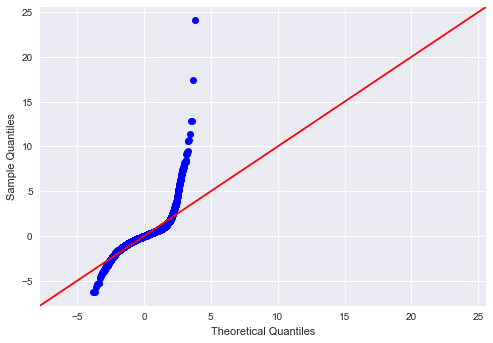

In [69]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

There are more errors as price increases. This needs to be refined so that the model is accurate. This model cannot be used without further refinement.

## Checking Homoscedasticity 

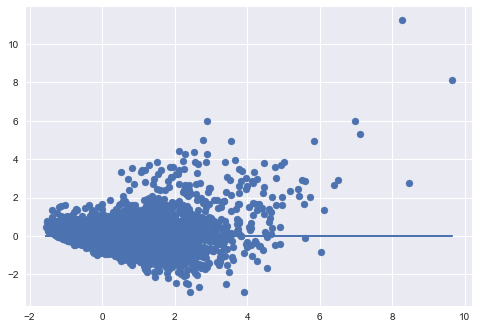

In [70]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Funnel-shaped. Need to correct.

## Dealing with Outliers

I want to switch back to encoded_df so that I can see what the acutal price is, instead of the normalized price. I will drop the same columns that I dropped from df_norm so that they contain the same data.

In [73]:
encoded_df = encoded_df.drop(['sqft_living', 'grade', 'sqft_living15'], axis=1)
#encoded_df = encoded_df.drop(['sqft_living', 'grade'], axis=1)
encoded_df.head(1)

,price,bedrooms,bathrooms,sqft_above,sqft_basement,floors_15,floors_20,floors_25,floors_30,floors_35,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
3,660000.0,10,3.0,1860.0,1060.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

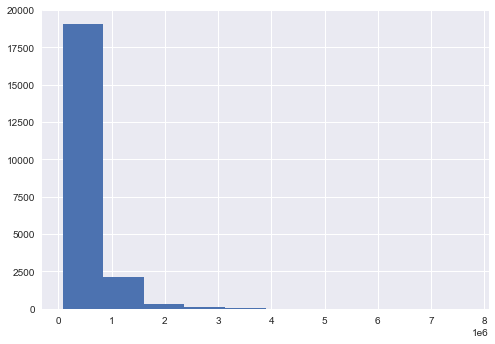

In [74]:
encoded_df.price.hist()

In [75]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, encoded_df.price.quantile(q=q)))

0.8 percentile: 700700.0000000007
0.81 percentile: 718000.0
0.82 percentile: 730026.7399999999
0.83 percentile: 749950.0
0.84 percentile: 760034.3999999998
0.85 percentile: 779950.0
0.86 percentile: 799000.0
0.87 percentile: 815000.0
0.88 percentile: 836920.0
0.89 percentile: 859980.8
0.9 percentile: 887000.0
0.91 percentile: 919996.3
0.92 percentile: 950000.0
0.93 percentile: 997974.5
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [76]:
for i in range(0,20):
    q = i/100
    print("{} percentile: {}".format(q, encoded_df.price.quantile(q=q)))

0.0 percentile: 78000.0
0.01 percentile: 154000.0
0.02 percentile: 175000.0
0.03 percentile: 192000.0
0.04 percentile: 202500.0
0.05 percentile: 210000.0
0.06 percentile: 219950.0
0.07 percentile: 226500.0
0.08 percentile: 234000.0
0.09 percentile: 240000.0
0.1 percentile: 245000.0
0.11 percentile: 250000.0
0.12 percentile: 255000.0
0.13 percentile: 260000.0
0.14 percentile: 266000.0
0.15 percentile: 270000.0
0.16 percentile: 275046.64
0.17 percentile: 280000.0
0.18 percentile: 286000.0
0.19 percentile: 291000.0


In [78]:
df = encoded_df

orig_tot = len(df)
df = df[df.price < 1500000]# Subsetting to remove extreme outliers
df = df[df.price > 149000]
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.price = df.price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
final_model = ols(formula=formula, data=train).fit()
final_model.summary()


Percent removed: 0.032555339446142445


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     895.2
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:08:31   Log-Likelihood:                 3273.6
No. Observations:               15668   AIC:                            -6387.
Df Residuals:                   15588   BIC:                            -5774.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.8721      0.014    854.671      0.000      11.845      11.899
bedrooms         -0.0279      0.002    -11.891      0.000      -0.033      -0.023
bathrooms         0.0499      0.004     13.650      0.000       0.043       0.057
sqft_above        0.0003   3.53e-06     98.763      0.000       0.000       0.000
sqft_basement     0.0002   4.98e-06     48.692      0.000       0.000       0.000
floors_15         0.0111      0.006      1.788      0.074      -0.001       0.023
floors_20        -0.0368      0.005     -7.223      0.000      -0.047      -0.027
floors_25        -0.0674      0.021     -3.189      0.001      -0.109      -0.026
floors_30        -0.1299      0.011    -11.755      0.000      -0.152      -0.108
floors_35        -0.1310      0.099     -1.325      0.185      -0.325       0.063
waterfront_10     0.6321      0.029     22.091      0.000       0.576       0.688
zipcode_98002    -0.0546      0.020     -2.680      0.007      -0.094      -0.015
zipcode_98003     0.0315      0.018      1.780      0.075      -0.003       0.066
zipcode_98004     1.1535      0.020     57.728      0.000       1.114       1.193
zipcode_98005     0.7981      0.022     36.488      0.000       0.755       0.841
zipcode_98006     0.7184      0.016     45.028      0.000       0.687       0.750
zipcode_98007     0.7047      0.022     31.941      0.000       0.661       0.748
zipcode_98008     0.6928      0.019     37.428      0.000       0.657       0.729
zipcode_98010     0.2485      0.026      9.665      0.000       0.198       0.299
zipcode_98011     0.4490      0.020     22.535      0.000       0.410       0.488
zipcode_98014     0.3188      0.024     13.226      0.000       0.272       0.366
zipcode_98019     0.3182      0.020     15.606      0.000       0.278       0.358
zipcode_98022     0.1178      0.019      6.119      0.000       0.080       0.156
zipcode_98023    -0.0142      0.016     -0.896      0.370      -0.045       0.017
zipcode_98024     0.4217      0.029     14.575      0.000       0.365       0.478
zipcode_98027     0.5423      0.017     32.697      0.000       0.510       0.575
zipcode_98028     0.4264      0.018     23.422      0.000       0.391       0.462
zipcode_98029     0.6263      0.018     35.633      0.000       0.592       0.661
zipcode_98030     0.0398      0.018      2.153      0.031       0.004       0.076
zipcode_98031     0.0671      0.018      3.661      0.000       0.031       0.103
zipcode_98032    -0.0020      0.024     -0.082      0.935      -0.050       0.046
zipcode_98033     0.8210      0.016     50.538      0.000       0.789       0.853
zipcode_98034     0.5280      0.016     33.829      0.000       0.497       0.559
zipcode_98038     0.1620      0.015     10.589      0.000       0.132       0.192
zipcode_98039     1.3054      0.056     23.353   

Model Analysis: Removing some of the price outliers on each end improved the model. (R2 is now at 83%)
- This only removed 2.7% of the data, which is acceptable.

In [79]:
#making sure the changes are saved as final_df
final_df = df
final_df.head()

,price,bedrooms,bathrooms,sqft_above,sqft_basement,floors_15,floors_20,floors_25,floors_30,floors_35,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
3,13.399995,10,3.00,1860.0,1060.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.955273,10,5.25,2500.0,2090.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13.017003,9,7.50,4050.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13.747232,9,3.00,1880.0,940.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,13.458836,9,3.00,2830.0,850.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

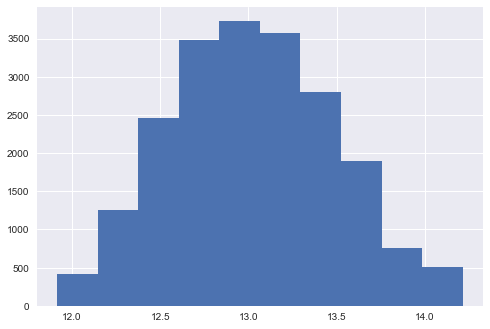

In [80]:
final_df.price.hist()

This histogram now looks to have a normal distribution. This is a good sign.

## Normalizing final_df and running model on it

In [81]:
final_df.describe()

,price,bedrooms,bathrooms,sqft_above,sqft_basement,floors_15,floors_20,floors_25,floors_30,floors_35,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,20891.000000,20891.000000,20891.000000,20891.000000,20891.000000,20891.000000,20891.000000,20891.000000,20891.000000,20891.000000,...,20891.000000,20891.000000,20891.000000,20891.000000,20891.000000,20891.000000,20891.000000,20891.000000,20891.000000,20891.000000
mean,13.021366,3.357618,2.088555,1749.068786,280.479106,0.089799,0.376669,0.006319,0.028242,0.000287,...,0.012876,0.002633,0.021110,0.011728,0.011919,0.011632,0.012158,0.006319,0.012972,0.014504
std,0.462517,0.887476,0.727015,759.628497,423.420843,0.285901,0.484562,0.079239,0.165667,0.016945,...,0.112744,0.051244,0.143753,0.107659,0.108524,0.107224,0.109595,0.079239,0.113157,0.119558
min,11.915052,1.000000,0.500000,370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.680753,3.000000,1.750000,1190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.011432,3.000000,2.250000,1550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.345507,4.000000,2.500000,2160.000000,540.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.214287,10.000000,7.500000,7320.000000,2850.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
final_df_norm = norm_feat(final_df)
final_df_norm.head()

,price,bedrooms,bathrooms,sqft_above,sqft_basement,floors_15,floors_20,floors_25,floors_30,floors_35,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
3,0.818627,7.484580,1.253681,0.146034,1.841007,-0.314093,1.286378,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,-0.109828,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312
4,2.019181,7.484580,4.348529,0.988551,4.273575,-0.314093,-0.777339,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,-0.109828,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312
5,-0.009434,6.357788,7.443376,3.029022,-0.662412,-0.314093,1.286378,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,-0.109828,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312
6,1.569380,6.357788,1.253681,0.172362,1.557601,-0.314093,1.286378,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,-0.109828,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312
7,0.945845,6.357788,1.253681,1.422973,1.345047,-0.314093,1.286378,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,-0.109828,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312


In [83]:
# Defining the problem
outcome = 'price'
x_cols = list(final_df_norm.columns)
x_cols.remove(outcome)

In [84]:
train, test = train_test_split(final_df_norm)

In [85]:
print(len(train), len(test))
train.head()

15668 5223


,price,bedrooms,bathrooms,sqft_above,sqft_basement,floors_15,floors_20,floors_25,floors_30,floors_35,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
10579,-1.751947,-0.402961,-1.497294,-0.696484,-0.662412,-0.314093,-0.777339,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,-0.109828,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312
8107,1.403447,0.723830,0.565938,1.265002,-0.662412,-0.314093,-0.777339,-0.079739,5.865733,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,-0.109828,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312
3491,2.444485,0.723830,0.222066,1.001715,2.336968,-0.314093,1.286378,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,-0.109828,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312
3940,-1.113880,0.723830,0.565938,-0.762305,0.518446,-0.314093,-0.777339,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,9.104704,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312
18638,0.760357,-0.402961,-0.465678,-0.683319,0.754618,-0.314093,-0.777339,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,-0.109828,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312


In [86]:
test.head()

,price,bedrooms,bathrooms,sqft_above,sqft_basement,floors_15,floors_20,floors_25,floors_30,floors_35,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
18631,-1.154294,-0.402961,-1.497294,-0.169910,-0.662412,3.183621,-0.777339,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,9.104704,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312
13667,-0.886118,-0.402961,0.565938,0.290841,-0.662412,-0.314093,1.286378,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,-0.109828,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312
12692,-1.097924,-0.402961,0.565938,-0.090924,-0.662412,-0.314093,1.286378,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,-0.109828,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312
9714,1.165907,-0.402961,0.565938,1.357152,-0.662412,-0.314093,1.286378,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,-0.109828,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312
19722,-1.508074,-1.529753,-1.497294,-1.381029,-0.662412,-0.314093,-0.777339,-0.079739,-0.170474,-0.016949,...,-0.114209,-0.051376,-0.146846,-0.108932,-0.109828,-0.108481,-0.110939,-0.079739,-0.114638,-0.121312


In [87]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     904.0
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:09:14   Log-Likelihood:                -8722.6
No. Observations:               15668   AIC:                         1.761e+04
Df Residuals:                   15588   BIC:                         1.822e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0012      0.003     -0.359      0.720      -0.008       0.005
bedrooms         -0.0492      0.004    -11.056      0.000      -0.058      -0.040
bathrooms         0.0758      0.006     13.277      0.000       0.065       0.087
sqft_above        0.5749      0.006     99.138      0.000       0.563       0.586
sqft_basement     0.2234      0.005     49.296      0.000       0.215       0.232
floors_15         0.0102      0.004      2.676      0.007       0.003       0.018
floors_20        -0.0379      0.005     -7.166      0.000      -0.048      -0.028
floors_25        -0.0071      0.003     -2.056      0.040      -0.014      -0.000
floors_30        -0.0443      0.004    -11.457      0.000      -0.052      -0.037
floors_35        -0.0067      0.004     -1.855      0.064      -0.014       0.000
waterfront_10     0.0793      0.003     23.033      0.000       0.073       0.086
zipcode_98002    -0.0102      0.004     -2.436      0.015      -0.018      -0.002
zipcode_98003     0.0075      0.004      1.686      0.092      -0.001       0.016
zipcode_98004     0.2415      0.004     56.501      0.000       0.233       0.250
zipcode_98005     0.1569      0.004     37.862      0.000       0.149       0.165
zipcode_98006     0.2313      0.005     45.266      0.000       0.221       0.241
zipcode_98007     0.1235      0.004     31.231      0.000       0.116       0.131
zipcode_98008     0.1700      0.005     37.763      0.000       0.161       0.179
zipcode_98010     0.0420      0.004     11.094      0.000       0.035       0.049
zipcode_98011     0.0944      0.004     22.535      0.000       0.086       0.103
zipcode_98014     0.0529      0.004     13.598      0.000       0.045       0.061
zipcode_98019     0.0646      0.004     15.314      0.000       0.056       0.073
zipcode_98022     0.0250      0.004      5.750      0.000       0.016       0.033
zipcode_98023    -0.0037      0.005     -0.716      0.474      -0.014       0.006
zipcode_98024     0.0565      0.004     15.278      0.000       0.049       0.064
zipcode_98027     0.1641      0.005     33.807      0.000       0.155       0.174
zipcode_98028     0.1057      0.005     22.866      0.000       0.097       0.115
zipcode_98029     0.1679      0.005     36.327      0.000       0.159       0.177
zipcode_98030     0.0125      0.004      2.844      0.004       0.004       0.021
zipcode_98031     0.0168      0.005      3.725      0.000       0.008       0.026
zipcode_98032     0.0005      0.004      0.130      0.897      -0.007       0.008
zipcode_98033     0.2400      0.005     48.733      0.000       0.230       0.250
zipcode_98034     0.1853      0.005     35.194      0.000       0.175       0.196
zipcode_98038     0.0564      0.005     10.378      0.000       0.046       0.067
zipcode_98039     0.0767      0.004     17.662   

## Analysis of Final Model

## Checking Assumptions Again

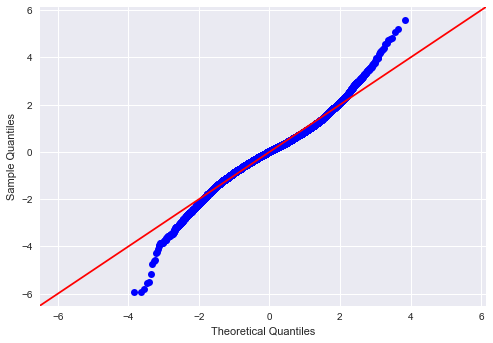

In [88]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Normality is definitely improved, but it is still going to be unreliable with really large or really small quantities.

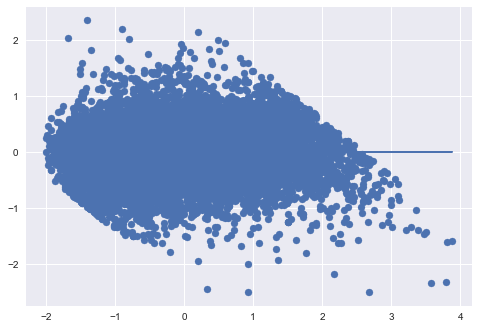

In [89]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Homoscedasity: Also improved, but still not fully looking like it needs to.

If I attempt to remove more outliers from price, the model R2 score drops, and there is no difference with the assumption checks. I will need to refine other variables to improve my model.

## Checking Mulitcolinearity

In [90]:
x_cols = list(final_df_norm.columns)
x_cols.remove(outcome)

X = final_df_norm[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.725345418334846),
 ('bathrooms', 2.82238476525114),
 ('sqft_above', 2.975970004831661),
 ('sqft_basement', 1.7933629790444117),
 ('floors_15', 1.2738678719792529),
 ('floors_20', 2.449663761067925),
 ('floors_25', 1.0759765838954303),
 ('floors_30', 1.3453412877794635),
 ('floors_35', 1.0079129706237475),
 ('waterfront_10', 1.06663742565662),
 ('zipcode_98002', 1.5207093217762302),
 ('zipcode_98003', 1.7656811190337658),
 ('zipcode_98004', 1.5733009238675293),
 ('zipcode_98005', 1.4596793281386964),
 ('zipcode_98006', 2.2879307906425783),
 ('zipcode_98007', 1.3920247017825278),
 ('zipcode_98008', 1.7627679589852217),
 ('zipcode_98010', 1.276848435169379),
 ('zipcode_98011', 1.5402269382936988),
 ('zipcode_98014', 1.3340598317912602),
 ('zipcode_98019', 1.526854774437784),
 ('zipcode_98022', 1.6435292550486682),
 ('zipcode_98023', 2.3275328256924777),
 ('zipcode_98024', 1.2077097251776236),
 ('zipcode_98027', 2.117474796847355),
 ('zipcode_98028', 1.7769354151754844),
 (

# Recommendations